In [1]:

from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline



In [51]:
##train데이터셋 불러오기
train_df = pd.read_csv('./train.csv')
train_df.drop([ 'X_04', 'X_48', 'X_47', 'X_23'], inplace= True, axis=1)

In [52]:
##input, output 나누기

train_x = train_df.filter(regex='X') # Input : X Featrue
train_Y_01 = train_df.filter(regex='Y_01') # Output : Y_01 Feature..
train_Y_02 = train_df.filter(regex='Y_02')
train_Y_03 = train_df.filter(regex='Y_03')
train_Y_04 = train_df.filter(regex='Y_04')
train_Y_05 = train_df.filter(regex='Y_05')
train_Y_06 = train_df.filter(regex='Y_06')
train_Y_07 = train_df.filter(regex='Y_07')
train_Y_08 = train_df.filter(regex='Y_08')
train_Y_09 = train_df.filter(regex='Y_09')
train_Y_10 = train_df.filter(regex='Y_10')
train_Y_11 = train_df.filter(regex='Y_11')
train_Y_12 = train_df.filter(regex='Y_12')
train_Y_13 = train_df.filter(regex='Y_13')
train_Y_14 = train_df.filter(regex='Y_14')

In [4]:
##xgb_model로 train_x1에 대한 예측 모델 LR1 만들기

xgb_model = xgb.XGBRegressor(n_estimators=3000, max_depth=8, learning_rate=0.005, gamma = 1.5, reg_alpha=0.8,subsample=0.8, n_jobs=-1)
LR1 = xgb_model.fit(train_x, train_Y_01)

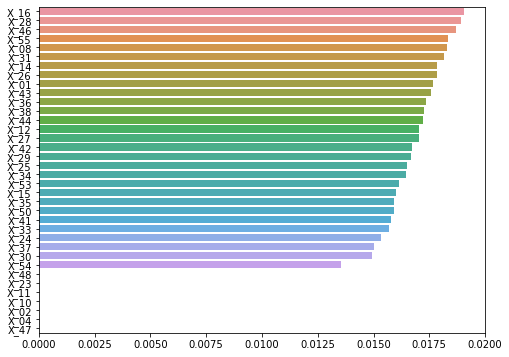

Index(['X_16', 'X_28', 'X_46', 'X_55', 'X_08', 'X_31', 'X_14', 'X_26', 'X_01',
       'X_43', 'X_36', 'X_38', 'X_44', 'X_12', 'X_27', 'X_42', 'X_29', 'X_25',
       'X_34', 'X_53', 'X_15', 'X_35', 'X_50', 'X_41', 'X_33', 'X_24', 'X_37',
       'X_30', 'X_54', 'X_48', 'X_23', 'X_11', 'X_10', 'X_02', 'X_04', 'X_47'],
      dtype='object')

In [9]:
ftr_importances_values = LR1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns)
ftr_top1 = ftr_importances.sort_values(ascending=False)[20:]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top1, y=ftr_top1.index)
plt.show()
a = ftr_top1.index[:]
a


In [7]:
##LR1 예측력 확인 
train_predict1 = LR1.predict(train_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict1, train_Y_01))))


RMSE':0.3391512970390758


In [ ]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(LR1, ax=ax)

In [11]:
##xgb_model로 train_x2에 대한 예측 모델 LR2 만들기
xgb_model = xgb.XGBRegressor(n_estimators=3000, max_depth=8, learning_rate=0.005, gamma = 1.5, reg_alpha=0.8,subsample=0.8, n_jobs=-1)
LR2 = xgb_model.fit(train_x, train_Y_02)

In [12]:
##LR2 예측력 확인 
train_predict2 = LR2.predict(train_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict2, train_Y_02))))

RMSE':0.36423367377330435


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

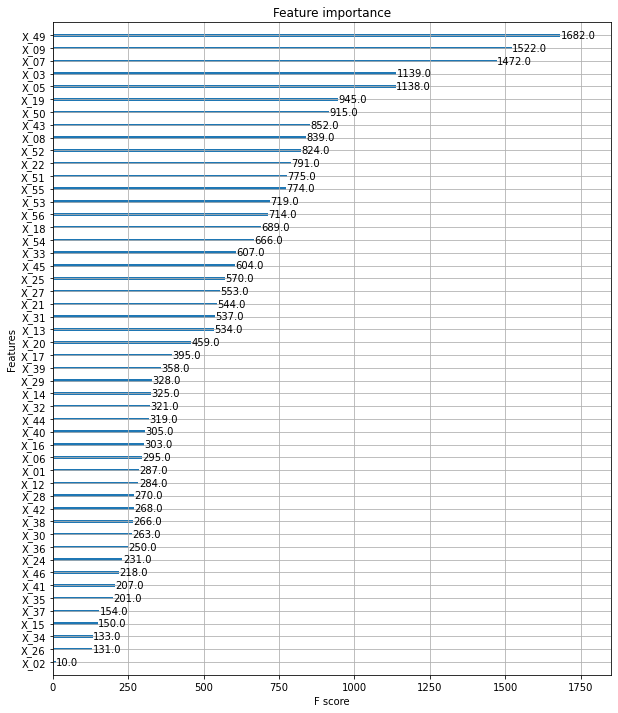

In [13]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(LR2, ax=ax)

In [14]:
##xgb_model로 train_x2에 대한 예측 모델 LR2 만들기
xgb_model = xgb.XGBRegressor(n_estimators=3000, max_depth=8, learning_rate=0.005, gamma = 1.5, reg_alpha=0.8,subsample=0.8, n_jobs=-1)
LR3 = xgb_model.fit(train_x, train_Y_03)

In [15]:
##LR1 예측력 확인 
train_predict3 = LR3.predict(train_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict3, train_Y_03))))

RMSE':0.34432281360591943


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

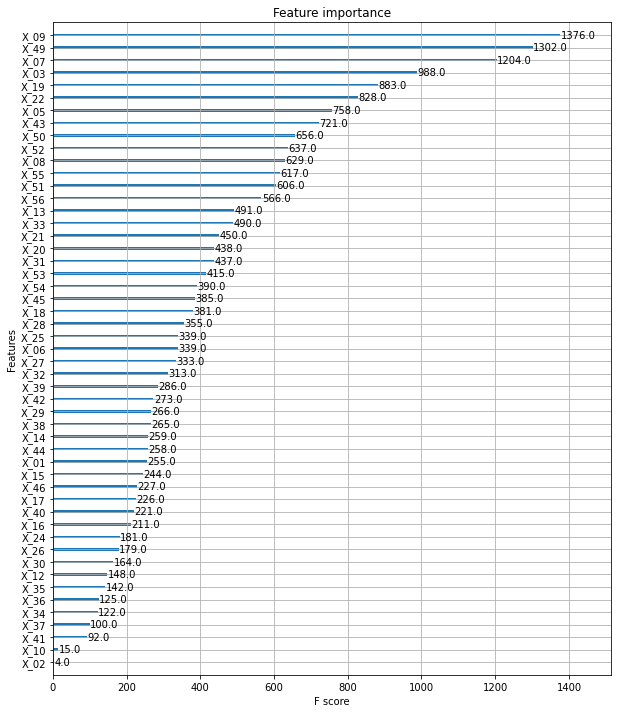

In [16]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(LR3, ax=ax)

In [40]:
##xgb_model로 train_x2에 대한 예측 모델 LR2 만들기
xgb_model = xgb.XGBRegressor(n_estimators=3000, max_depth=15, learning_rate=0.005, gamma = 1, reg_alpha=0.5,subsample=0.9, n_jobs=-1)
LR4 = xgb_model.fit(train_x, train_Y_04)

In [41]:
##LR4 예측력 확인 
train_predict4 = LR4.predict(train_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict4, train_Y_04))))

RMSE':0.36170309767007325


In [42]:
a = pd.DataFrame(train_predict4)
print(a.describe())
print(train_Y_04.describe())

                  0
count  39607.000000
mean      13.621184
std        2.391101
min        0.369183
25%       12.048777
50%       13.827665
75%       15.393811
max       97.068901
               Y_04
count  39607.000000
mean      13.621191
std        2.686632
min       -0.331000
25%       11.822000
50%       13.837000
75%       15.626000
max       98.794000


In [ ]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(LR4, ax=ax)

In [53]:
##xgb_model로 train_x2에 대한 예측 모델 LR2 만들기
xgb_model = xgb.XGBRegressor(n_estimators=3000, max_depth=15, learning_rate=0.005, gamma = 1.5, reg_alpha=0.8,subsample=0.8, n_jobs=-1)
LR5 = xgb_model.fit(train_x, train_Y_05)

In [54]:
##LR1 예측력 확인 
train_predict5 = LR5.predict(train_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict5, train_Y_05))))

RMSE':0.44476163885536757


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

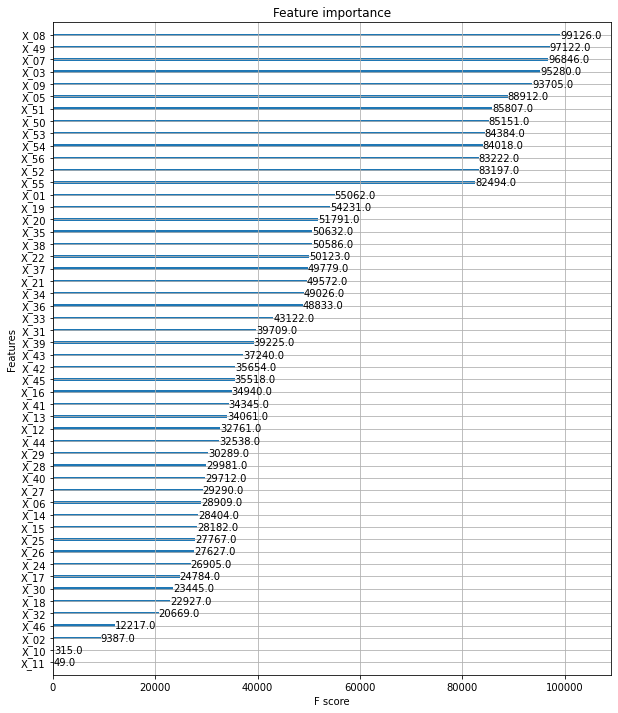

In [45]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(LR5, ax=ax)

In [46]:
a = pd.DataFrame(train_predict5)
print(a.describe())
print(train_Y_05.describe())

                  0
count  39607.000000
mean      31.290794
std        2.162299
min       20.477667
25%       30.034839
50%       31.688070
75%       32.890905
max       36.318230
               Y_05
count  39607.000000
mean      31.290467
std        2.543222
min       18.589000
25%       29.768000
50%       31.710000
75%       33.184000
max       37.250000


In [ ]:
##xgb_model로 train_x2에 대한 예측 모델 LR2 만들기
xgb_model = xgb.XGBRegressor(n_estimators=3000, max_depth=8, learning_rate=0.005, gamma = 1.5, reg_alpha=0.8,subsample=0.8, n_jobs=-1)
LR6 = xgb_model.fit(train_x, train_Y_06)

In [ ]:
##LR1 예측력 확인 
train_predict6 = LR6.predict(train_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict6, train_Y_06))))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(LR6, ax=ax)

In [ ]:
##xgb_model로 train_x2에 대한 예측 모델 LR2 만들기
xgb_model = xgb.XGBRegressor(n_estimators=3000, max_depth=8, learning_rate=0.005, gamma = 1.5, reg_alpha=0.8,subsample=0.8, n_jobs=-1)
LR7 = xgb_model.fit(train_x, train_Y_07)

In [ ]:
##LR1 예측력 확인 
train_predict7 = LR7.predict(train_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict7, train_Y_07))))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(LR7, ax=ax)

In [ ]:
##xgb_model로 train_x2에 대한 예측 모델 LR2 만들기
xgb_model = xgb.XGBRegressor(n_estimators=3000, max_depth=8, learning_rate=0.005, gamma = 1.5, reg_alpha=0.8,subsample=0.8, n_jobs=-1)
LR8 = xgb_model.fit(train_x, train_Y_08)

In [ ]:
##LR1 예측력 확인 
train_predict8 = LR8.predict(train_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict8, train_Y_08))))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(LR8, ax=ax)

In [ ]:
##xgb_model로 train_x2에 대한 예측 모델 LR2 만들기
xgb_model = xgb.XGBRegressor(n_estimators=3000, max_depth=8, learning_rate=0.005, gamma = 1.5, reg_alpha=0.8,subsample=0.8, n_jobs=-1)
LR9 = xgb_model.fit(train_x, train_Y_09)

In [ ]:
##LR1 예측력 확인 
train_predict9 = LR3.predict(train_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict9, train_Y_09))))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(LR9, ax=ax)

In [ ]:
##xgb_model로 train_x2에 대한 예측 모델 LR2 만들기
xgb_model = xgb.XGBRegressor(n_estimators=3000, max_depth=8, learning_rate=0.005, gamma = 1.5, reg_alpha=0.8,subsample=0.8, n_jobs=-1)
LR10 = xgb_model.fit(train_x, train_Y_10)

In [ ]:

##LR1 예측력 확인 
train_predict10 = LR10.predict(train_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict10, train_Y_10))))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(LR10, ax=ax)

In [ ]:
##xgb_model로 train_x2에 대한 예측 모델 LR2 만들기
xgb_model = xgb.XGBRegressor(n_estimators=3000, max_depth=8, learning_rate=0.005, gamma = 1.5, reg_alpha=0.8,subsample=0.8, n_jobs=-1)
LR11 = xgb_model.fit(train_x, train_Y_11)

In [ ]:
##LR1 예측력 확인 
train_predict11 = LR11.predict(train_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict11, train_Y_11))))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(LR11, ax=ax)

In [ ]:
##xgb_model로 train_x2에 대한 예측 모델 LR2 만들기
xgb_model = xgb.XGBRegressor(n_estimators=3000, max_depth=8, learning_rate=0.005, gamma = 1.5, reg_alpha=0.8,subsample=0.8, n_jobs=-1)
LR12 = xgb_model.fit(train_x, train_Y_12)

In [ ]:
##LR1 예측력 확인 
train_predict12 = LR12.predict(train_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict12, train_Y_12))))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(LR12, ax=ax)

In [ ]:
##xgb_model로 train_x2에 대한 예측 모델 LR2 만들기
xgb_model = xgb.XGBRegressor(n_estimators=3000, max_depth=8, learning_rate=0.005, gamma = 1.5, reg_alpha=0.8,subsample=0.8, n_jobs=-1)
LR13 = xgb_model.fit(train_x, train_Y_13)

In [ ]:
##LR1 예측력 확인 
train_predict13 = LR13.predict(train_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict13, train_Y_13))))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(LR13, ax=ax)

In [ ]:
##xgb_model로 train_x2에 대한 예측 모델 LR2 만들기
xgb_model = xgb.XGBRegressor(n_estimators=3000, max_depth=8, learning_rate=0.005, gamma = 1.5, reg_alpha=0.8,subsample=0.8, n_jobs=-1)
LR14 = xgb_model.fit(train_x, train_Y_14)

In [ ]:
##LR1 예측력 확인 
train_predict14 = LR14.predict(train_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict14, train_Y_14))))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(LR14, ax=ax)